In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf
tf.random.set_seed(
    42
)


import seaborn as sns

tf_chkpt_path = 'tf_AlexNet_checkpoints/'

In [3]:
from src.helperFunctions import display_model_trainTestGraphs

# Training Set

In [4]:
# Normalizing data for 8 bit
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'images/train/',
    target_size = (227,227),
    batch_size=225,
    color_mode='rgb',
    class_mode='categorical'
)

Found 48979 images belonging to 8 classes.


# Validation Set

In [5]:
# Normalizing data for 8 bit
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    'images/val/',
    target_size = (227,227),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical'
)

Found 14175 images belonging to 8 classes.


# Test Set

In [6]:
# Normalizing data for 8 bit
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'images/test/',
    target_size = (227,227),
    batch_size=8,
    color_mode='rgb',
    class_mode='categorical'
)

Found 1793 images belonging to 8 classes.


# Modeling

In [7]:
early_stop = EarlyStopping(monitor='val_loss', 
                           min_delta=1e-8,
                           verbose=1,
                           patience = 5,
                           restore_best_weights=True,
                           mode='min')

# Model - AlexNet

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

200/200 [==============================] - 52s 257ms/step - loss: 0.0301 - accuracy: 0.9908 - precision: 0.9912 - recall: 0.9907 - val_loss: 1.1239 - val_accuracy: 0.8313 - val_precision: 0.8327 - val_recall: 0.8297
Epoch 24/90
200/200 [==============================] - 51s 256ms/step - loss: 0.0219 - accuracy: 0.9933 - precision: 0.9935 - recall: 0.9932 - val_loss: 1.3585 - val_accuracy: 0.7986 - val_precision: 0.8008 - val_recall: 0.7973
Epoch 25/90
200/200 [==============================] - 51s 255ms/step - loss: 0.0192 - accuracy: 0.9939 - precision: 0.9940 - recall: 0.9938 - val_loss: 6.8103 - val_accuracy: 0.4151 - val_precision: 0.4216 - val_recall: 0.4046
Epoch 26/90
200/200 [==============================] - 52s 258ms/step - loss: 0.0330 - accuracy: 0.9899 - precision: 0.9901 - recall: 0.9895 - val_loss: 1.1703 - val_accuracy: 0.8694 - val_precision: 0.8695 - val_recall: 0.8691
Epoch 27/90
200/200 [==============================] - 52s 258ms/step - loss: 0.0200 - accuracy: 0.9

Epoch 59/90
200/200 [==============================] - 52s 258ms/step - loss: 0.0149 - accuracy: 0.9959 - precision: 0.9960 - recall: 0.9959 - val_loss: 1.1916 - val_accuracy: 0.8527 - val_precision: 0.8537 - val_recall: 0.8523
Epoch 60/90
200/200 [==============================] - 51s 255ms/step - loss: 0.0113 - accuracy: 0.9969 - precision: 0.9969 - recall: 0.9969 - val_loss: 3.8730 - val_accuracy: 0.6263 - val_precision: 0.6290 - val_recall: 0.6248
Epoch 61/90
200/200 [==============================] - 51s 257ms/step - loss: 0.0123 - accuracy: 0.9966 - precision: 0.9967 - recall: 0.9966 - val_loss: 2.2566 - val_accuracy: 0.6380 - val_precision: 0.6436 - val_recall: 0.6302
Epoch 62/90
200/200 [==============================] - 52s 260ms/step - loss: 0.0091 - accuracy: 0.9976 - precision: 0.9976 - recall: 0.9976 - val_loss: 1.5714 - val_accuracy: 0.8604 - val_precision: 0.8610 - val_recall: 0.8601
Epoch 63/90
200/200 [==============================] - 51s 255ms/step - loss: 0.0061 - a

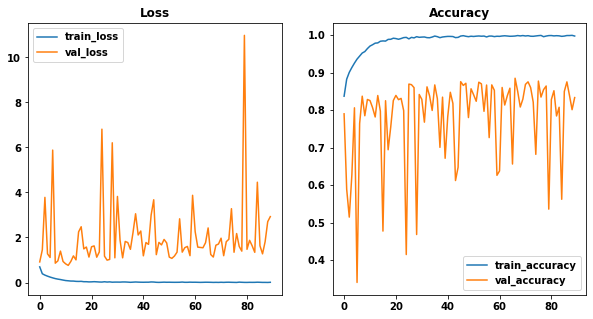

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(filters=96, kernel_size=11, strides=(4, 4), padding='valid', activation='relu',
                        input_shape=(227, 227, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2),padding='valid'))

model.add(layers.Conv2D(filters=256, kernel_size=(
        5, 5), strides=(1, 1), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Conv2D(filters=384, kernel_size=(
        3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=384, kernel_size=(
        3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=256, kernel_size=(
        3, 3), strides=(1, 1), activation='relu', padding="same"))
# model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss= losses.CategoricalCrossentropy(),
              metrics = ['accuracy', Precision(), Recall()])

model.summary()

results = model.fit(train_generator,
                    steps_per_epoch=200,  # Number of training samples to pull per epoch
                    epochs=90,  # Number of epochs
                    validation_data=val_generator,
                    validation_freq=1,
                    validation_steps=200,  # Number of validation samples to run validation on
                    )

display_model_trainTestGraphs(results)

In [9]:
results.model.save(tf_chkpt_path+'Model_1')

INFO:tensorflow:Assets written to: tf_AlexNet_checkpoints/Model_1\assets


INFO:tensorflow:Assets written to: tf_AlexNet_checkpoints/Model_1\assets


# Model - AlexNet with one extra MaxPooling

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_4 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_5 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                      

Epoch 22/90
200/200 [==============================] - 50s 251ms/step - loss: 0.0368 - accuracy: 0.9876 - precision_1: 0.9879 - recall_1: 0.9873 - val_loss: 1.1657 - val_accuracy: 0.7736 - val_precision_1: 0.7803 - val_recall_1: 0.7688
Epoch 23/90
200/200 [==============================] - 50s 249ms/step - loss: 0.0370 - accuracy: 0.9884 - precision_1: 0.9886 - recall_1: 0.9881 - val_loss: 0.7721 - val_accuracy: 0.8455 - val_precision_1: 0.8478 - val_recall_1: 0.8438
Epoch 24/90
200/200 [==============================] - 50s 249ms/step - loss: 0.0279 - accuracy: 0.9908 - precision_1: 0.9909 - recall_1: 0.9907 - val_loss: 6.5323 - val_accuracy: 0.4180 - val_precision_1: 0.4193 - val_recall_1: 0.4154
Epoch 25/90
200/200 [==============================] - 50s 249ms/step - loss: 0.0400 - accuracy: 0.9868 - precision_1: 0.9870 - recall_1: 0.9864 - val_loss: 1.3927 - val_accuracy: 0.7678 - val_precision_1: 0.7708 - val_recall_1: 0.7653
Epoch 26/90
200/200 [==============================] - 5

Epoch 57/90
200/200 [==============================] - 50s 249ms/step - loss: 0.0136 - accuracy: 0.9960 - precision_1: 0.9961 - recall_1: 0.9960 - val_loss: 1.1117 - val_accuracy: 0.8305 - val_precision_1: 0.8331 - val_recall_1: 0.8277
Epoch 58/90
200/200 [==============================] - 51s 252ms/step - loss: 0.0142 - accuracy: 0.9957 - precision_1: 0.9957 - recall_1: 0.9956 - val_loss: 0.9673 - val_accuracy: 0.8613 - val_precision_1: 0.8623 - val_recall_1: 0.8605
Epoch 59/90
200/200 [==============================] - 50s 250ms/step - loss: 0.0148 - accuracy: 0.9959 - precision_1: 0.9959 - recall_1: 0.9959 - val_loss: 1.3555 - val_accuracy: 0.8360 - val_precision_1: 0.8368 - val_recall_1: 0.8357
Epoch 60/90
200/200 [==============================] - 51s 252ms/step - loss: 0.0065 - accuracy: 0.9979 - precision_1: 0.9979 - recall_1: 0.9979 - val_loss: 1.5249 - val_accuracy: 0.8484 - val_precision_1: 0.8496 - val_recall_1: 0.8478
Epoch 61/90
200/200 [==============================] - 5

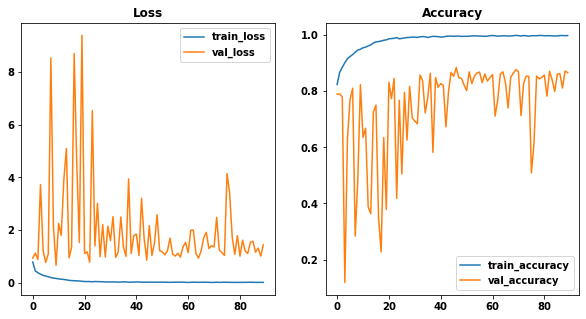

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(filters=96, kernel_size=11, strides=(4, 4), padding='valid', activation='relu',
                        input_shape=(227, 227, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2),padding='valid'))

model.add(layers.Conv2D(filters=256, kernel_size=(
        5, 5), strides=(1, 1), activation='relu', padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.Conv2D(filters=384, kernel_size=(
        3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=384, kernel_size=(
        3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(filters=256, kernel_size=(
        3, 3), strides=(1, 1), activation='relu', padding="same"))
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(8, activation='softmax'))


model.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
              loss= losses.CategoricalCrossentropy(),
              metrics = ['accuracy', Precision(), Recall()])

model.summary()

results = model.fit(train_generator,
                    steps_per_epoch=200,  # Number of training samples to pull per epoch
                    epochs=90,  # Number of epochs
                    validation_data=val_generator,
                    validation_freq=1,
                    validation_steps=200,  # Number of validation samples to run validation on
                    )

display_model_trainTestGraphs(results)

In [11]:
results.model.save(tf_chkpt_path+'Model_1_plusMaxPooling')

INFO:tensorflow:Assets written to: tf_AlexNet_checkpoints/Model_1_plusMaxPooling\assets


INFO:tensorflow:Assets written to: tf_AlexNet_checkpoints/Model_1_plusMaxPooling\assets
